# Decision Tree - regression --->  PHASE 1 model creation. 
## PROBLEM STATEMENT: 
### Profit prediction for startups based on the investment rate in different departments

In [2]:
# read the data set
import pandas as pd
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
# convert categorial into numerical data
dataset = pd.get_dummies(dataset, drop_first=True, dtype=int)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [5]:
# split i/p o/p
independent = dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York' ]]
independent.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [6]:
dependent = dataset[[ 'Profit']] 
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [7]:
# split train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent, dependent, test_size=0.20, random_state=True)

In [8]:
x_test 

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
27,72107.60,127864.55,353183.81,0,1
35,46014.02,85047.44,205517.64,0,1
40,28754.33,118546.05,172795.67,0,0
38,20229.59,65947.93,185265.10,0,1
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
48,542.05,51743.15,0.00,0,1
29,65605.48,153032.06,107138.38,0,1
46,1315.46,115816.21,297114.46,1,0
31,61136.38,152701.92,88218.23,0,1


In [9]:
y_test

,Profit
27,105008.31
35,96479.51
40,78239.91
38,81229.06
2,191050.39
3,182901.99
48,35673.41
29,101004.64
46,49490.75
31,97483.56


In [10]:
# model creation 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error',splitter='best')
regressor.fit(x_train,y_train)  # i/p  o/p

DecisionTreeRegressor()

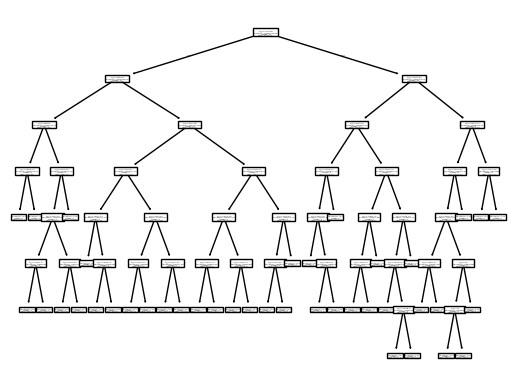

In [11]:
# tree - data visulization 
import matplotlib.pyplot as plt 
from sklearn import tree
tree.plot_tree(regressor)   # visulize my tree model
plt.show()  #  show graph

In [12]:
# test the model 
y_predicted = regressor.predict(x_test)
y_predicted

array([110352.25,  96712.8 ,  81005.76,  71498.49, 192261.83, 166187.94,
        64926.08, 103282.38,  71498.49,  97427.84])

In [13]:
# evaluation metrics
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_predicted)
r_score

0.9225579022073993

In [17]:
# save the model 
import pickle 
pickle.dump(regressor, open("finalized_model_decisionTreeRegressor.sav", "wb"))

In [18]:
#  load the model and predictcc
loaded_model = pickle.load(open("finalized_model_decisionTreeRegressor.sav" ,"rb"))